In [2]:
"""
 We can use KNN Classification for all sorts of data. Here we will use KNN to classify
 images of hand written English characters.
 In this dataset there are 1797 character image. Each image is 8x8 pixels i.e. of dimension
 64. We reshape each image to a 64x1 vector. Therefore we are "searching" in 64
 dimensional space.
 We will use cross validation on the training set to determine performance of a range
 of k values and then perform final evaluation on the test set.
 The dataset is built into scikit. However you will need to download it from the web as it is too
 large to be bundled directly.
"""
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn import neighbors
from sklearn.datasets import make_blobs

In [3]:
digits = datasets.load_digits()
"""
 Let's take a look at some sample images. The images in this dataset come from postal
 codes so they are all numeric.
"""

"\n Let's take a look at some sample images. The images in this dataset come from postal\n codes so they are all numeric.\n"

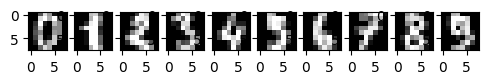

In [4]:
fig6 = plt.figure()
plt.gray()
for i in range(1,11):
    plt.subplot(1,11,i)
    plt.imshow(digits.images[i-1])

In [5]:
# Split the data into train, validation and test sets
trainData, testData, trainLabels, testLabels = train_test_split(np.array(digits.data), digits.target, test_size=0.25, random_state=42)
print("N Training Points: {}".format(len(trainLabels)))
print("m Test points: {}".format(len(testLabels)))

N Training Points: 1347
m Test points: 450


In [7]:
"""
Optimising k
To determine the optimal k we will train our classifier on the training data with various vlaues of k.
We will then evaluate the performance of each model on the validation set.
"""
# Store cv score for each k 
cv_scores = []
k_vals = []
#pip install threadpoolctl==3.1.0
#pip install --upgrade threadpoolctl
for k in range(1, 30, 2):
    model = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, trainData, trainLabels, cv=10, scoring="accuracy")
    score = scores.mean()
    cv_scores.append(score)
    k_vals.append(k)
    # PRINTING THE VARIABLE NOT THE ARRAY
    print("k={0}, cv_score={1:.2f}".format(k, score * 100))


k=1, cv_score=98.74
k=3, cv_score=98.37
k=5, cv_score=98.51
k=7, cv_score=97.92
k=9, cv_score=97.77
k=11, cv_score=97.62
k=13, cv_score=97.11
k=15, cv_score=97.33
k=17, cv_score=96.88
k=19, cv_score=96.21
k=21, cv_score=95.92
k=23, cv_score=95.77
k=25, cv_score=95.62
k=27, cv_score=95.40
k=29, cv_score=95.18


In [8]:
# Find best performing k
idx = np.argmax(cv_scores)
print("k={0} achieved highest accuracy of {1:.2f}".format(k_vals[idx], cv_scores[idx] * 100))

k=1 achieved highest accuracy of 98.74


In [9]:
"""
We now know that the best k for this set of training and validation data is  𝑘=1
 . We may find a different result if we reshuffle the data or obtain new data.

Finally we can build our optimal classifier and evaluate on the test set.

Note this is a multi-class classification example.
"""

model = neighbors.KNeighborsClassifier(n_neighbors = k_vals[idx])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

In [17]:
# Final classification report
print(classification_report(testLabels, predictions))
print(confusion_matrix(testLabels, predictions))

"""
Observations
Suprisingly our KNN classifier achieves near perfect classification accuracy on this data set.

Remember: more complex models do not guarantee better results. Sometimes some simple methods can be quite effective.
"""

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0

'\nObservations\nSuprisingly our KNN classifier achieves near perfect classification accuracy on this data set.\n\nRemember: more complex models do not guarantee better results. Sometimes some simple methods can be quite effective.\n'